In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv("dataset.csv")

In [14]:
df

,customerid,gender,age,annual income,spending score
0,1,male,19,15,39.0
1,2,male,21,15,81.0
2,3,female,20,16,6.0
3,4 female,23,16,77,NaN
4,5,female,31,17,40.0
5,7,female,35,18,6.0
6,8,female,23,18,94.0
7,9,male,64,19,3.0
8,10,female,30,19,72.0
9,11,male,67,19,14.0


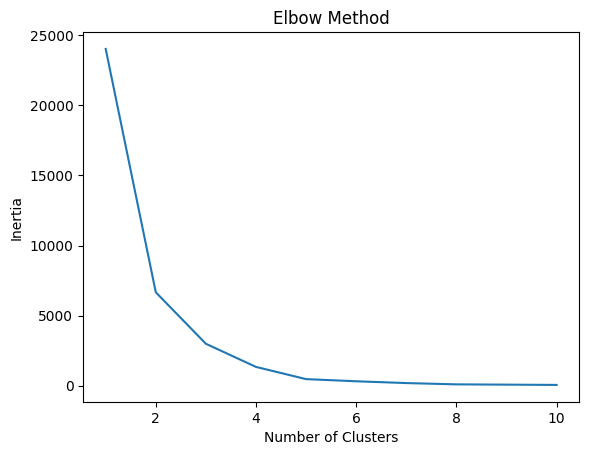

In [15]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10) # Set n_init explicitly
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [16]:
# Build the K-Means model with the chosen number of clusters (e.g., 5)
# Replace 5 with the number of clusters you determined from the elbow method
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans.fit(features)

# Add the cluster assignments to the original dataframe
df['cluster'] = kmeans.labels_

display(df.head())

,customerid,gender,age,annual income,spending score,cluster
0,1,male,19,15,39.0,2
1,2,male,21,15,81.0,1
2,3,female,20,16,6.0,0
3,4 female,23,16,77,NaN,3
4,5,female,31,17,40.0,2


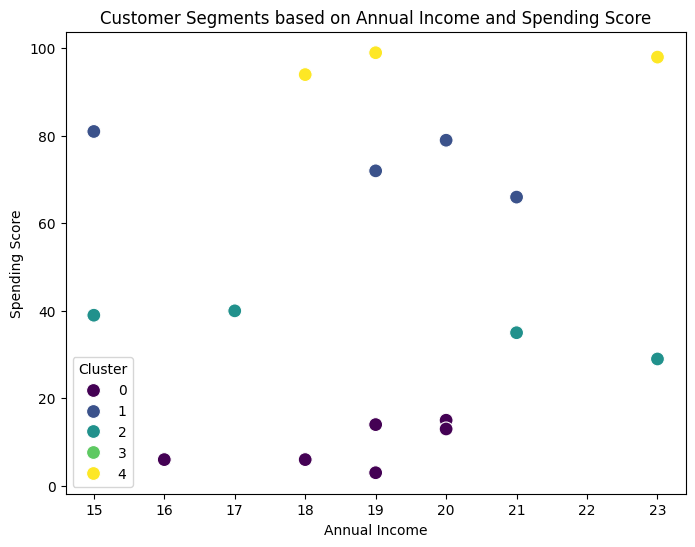

In [17]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='annual income', y='spending score', hue='cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()